# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 1/23/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 1/23/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,1268,38928341,3.3
Albania,28376,2877800,986.0
Algeria,14513,43851043,33.1
Andorra,6617,77265,8564.0
Angola,6864,32866268,20.9
Antigua and Barbuda,873,97928,891.5
Argentina,1551692,45195777,3433.3
Armenia,5856,2963234,197.6
Australia,1183813,25459700,4649.8


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Andorra,6617,77265,8564.0
Israel,709507,8655541,8197.1
Denmark,439469,5837213,7528.7
Seychelles,7399,98340,7523.9
France,4589711,65249843,7034.1
San Marino,2371,33938,6986.3
Portugal,581979,10196707,5707.5
Slovenia,112557,2078932,5414.2
Iceland,18132,341250,5313.4


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

1/19/22    8361262.0
1/20/22    8502132.0
1/21/22    8635461.0
1/22/22    8716804.0
1/23/22    8773030.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

1/10/22         NaN
1/11/22    120271.0
1/12/22     86232.0
1/13/22     89920.0
1/14/22     77175.0
1/15/22     44251.0
1/16/22     33129.0
1/17/22     82818.0
1/18/22    118105.0
1/19/22    139000.0
1/20/22    140870.0
1/21/22    133329.0
1/22/22     81343.0
1/23/22     56226.0
Name: Germany, dtype: float64

<AxesSubplot:>

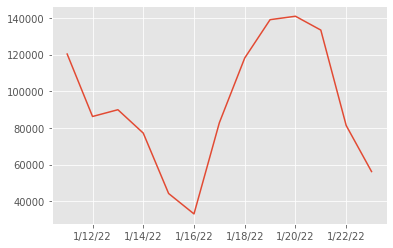

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

1446.2973382813122